In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:


# 1. Load dataset
file = pd.read_csv("car_prices_dataset.csv")
file= pd.get_dummies(file, drop_first=True)
# 2. Separate features (X) and target (y)
# Assume the target column is named "price"
X = file.drop(columns=["price"])  # all columns except price
y = file[["price"]]            # target column
file

,year,mileage,engine_size,horsepower,owner_count,price,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Petrol,transmission_Manual,brand_Honda,brand_Hyundai,brand_Suzuki,brand_Toyota,location_Karachi,location_Lahore,location_Peshawar,location_Quetta
0,2006,95084,3501,107,2,50000,False,False,True,False,False,True,False,False,True,False,False,False
1,2019,174695,1771,93,3,50000,False,False,False,False,False,True,False,False,True,False,False,False
2,2014,12392,1966,222,1,50000,False,True,False,True,False,False,False,True,False,False,False,False
3,2010,60680,3574,209,1,50000,True,False,False,True,True,False,False,False,False,False,False,True
4,2007,182789,2782,222,3,50000,False,False,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2016,144788,2331,350,3,50000,False,False,True,True,False,False,False,True,True,False,False,False
196,2001,115627,4240,122,3,50000,False,False,True,True,True,False,False,False,False,False,False,True
197,2001,75316,1623,331,3,50000,False,False,True,False,False,False,False,True,False,False,False,True
198,2021,7368,1728,298,4,50000,False,True,False,False,False,False,True,False,False,False,False,False


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)


In [12]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


R-squared: 0.0100


R-squared: 0.0100


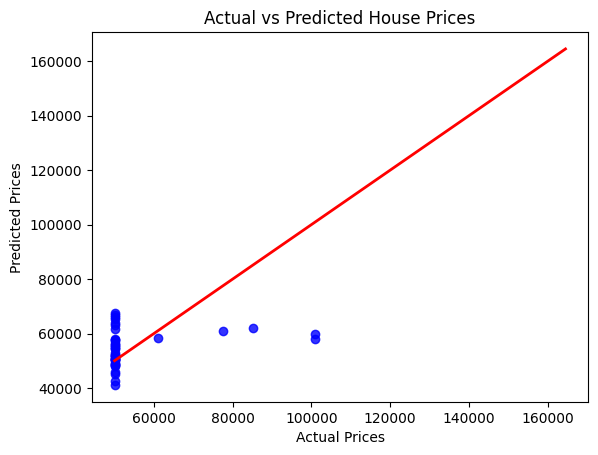

In [10]:
import matplotlib.pyplot as plt

# Scatter of actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.8, color="blue", label="Predicted")

# Perfect prediction line
plt.plot([y_test.min(), y_train.max()],
         [y_test.min(), y_train.max()],
         color="red", linestyle="-", linewidth=2, label="Perfect Fit")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
# plt.legend()
plt.show()
